$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge save$ $\hspace{0.1cm}$ $\Huge data$ $\hspace{0.1cm}$ $\Huge as$ $\hspace{0.1cm}$ $\Huge a$ $\hspace{0.1cm}$ $\Huge FITS$ $\hspace{0.1cm}$ $\Huge file$  $\Huge :$ 

# TO DO : 

# Modules : 

In [20]:
from astropy.io import fits
import numpy as np
import healpy as hp 
import matplotlib.pyplot as plt 

# Function : 

In [5]:
def File2FITS(data=None,dtype=np.float32,data_path=None,name_save=None, overwrite=True): 
    
    """
    Function which save data as a FITS file. 

    Parameters
    ----------
    
    data : array_like 
        An array, any object exposing the array interface, an object whose __array__ method returns an array,
        or any (nested) sequence.
    dtype : data_type
        Type under which the data is going to be stored in the FITS file. 
            For exemple/by default : float32 a float which is 32 bits long. 
    data_path : str
        Path were the FITS file will be stored. 
    name_save : str 
        Name of the FITS file in which the data will be saved. 
    Overwrite : bool 
        If True the FITS file can be overwrite, if False it can not be. 
        
    Returns
    -------
    str
        Tell us where the function stored the images. 

    """
        
    
    hdu = fits.PrimaryHDU()
    hdu.data = np.array(data, dtype)
    hdu.writeto(data_path + name_save + '.fits',overwrite=overwrite, checksum=False)
    
    return ('Data name : ', name_save + '.fits')    

# Launch : 

## Open Healpy map : 

In [6]:
data_path = '/users/mcharmetant/sz/CITA/'
file = 'tsz.fits'

In [9]:
tSZ = hp.read_map(filename=data_path+file, nest=False, hdu=1, h=False, verbose=True, memmap=False)

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


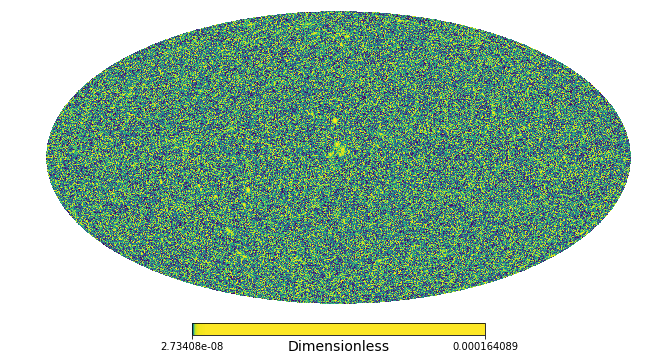

In [12]:
hp.mollview(map=tSZ, coord=None, nest=False, title='', unit='$Dimensionless$',norm='hist', xsize=2000)

## Take a cutout of this map : 

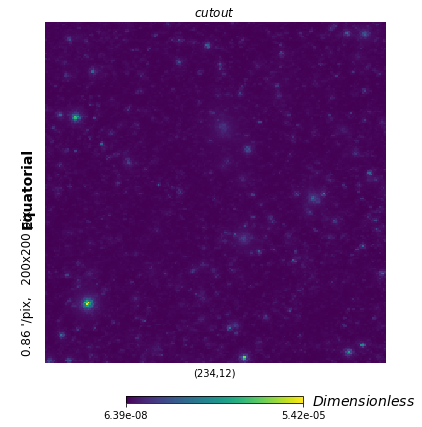

In [16]:
cutout = hp.gnomview(tSZ,coord=('G','C'),rot=(234, 12),reso=0.86,
                         title='$cutout$',unit='$Dimensionless$',xsize=200, ysize=200, 
                         nest=False, return_projected_map=True)

## Save the cutout as a FITS file :

In [17]:
saved_cutout = File2FITS(data=cutout,dtype=np.float32,data_path='/users/mcharmetant/data1/Data/',
                               name_save='test',overwrite=True)

In [18]:
hdul = fits.open('/users/mcharmetant/data1/Data/'+'test.fits')
data = hdul[0].data

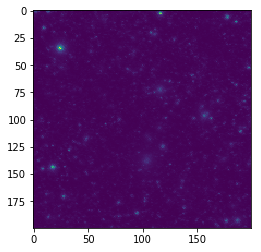

In [21]:
plt.imshow(data)